In [1]:
import pandas as pd
import urllib # sirve para acceder a archivos de internet y descargarlos automaticamnete
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
# os me sirve para crear la ruta de los directorios, donde quiero descargar mi archivo
file_path = os.path.join("data", "covid") #nombro las carpetas

In [ ]:
os.makedirs(file_path, exist_ok = True) #creacion de las carpetas

In [6]:
csv_path = os.path.join(file_path, 'data.csv') #decirle que guarde el nombre del archivo en la carpeta

In [ ]:
#urllib.request.urlretrieve('https://covid19.who.int/WHO-COVID-19-global-data.csv', csv_path) # descarga el archivo desde este link de internet

In [7]:
df = pd.read_csv(csv_path)

In [ ]:
df.head()

In [ ]:
df

In [8]:
df2 = df[["Date_reported","Country","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths"]]
df2

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,0,0,0,0
1,2020-01-04,Afghanistan,0,0,0,0
2,2020-01-05,Afghanistan,0,0,0,0
3,2020-01-06,Afghanistan,0,0,0,0
4,2020-01-07,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
132369,2021-07-12,Zimbabwe,912,67765,59,2185
132370,2021-07-13,Zimbabwe,2661,70426,51,2236
132371,2021-07-14,Zimbabwe,2845,73271,38,2274
132372,2021-07-15,Zimbabwe,3110,76381,58,2332


In [ ]:
df2.isnull().sum()

In [9]:
df4 = df2.groupby("Country").count()
df4#["Country"]

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,
Afghanistan,560,560,560,560,560
Albania,561,561,561,561,561
Algeria,561,561,561,561,561
American Samoa,561,561,561,561,561
Andorra,561,561,561,561,561
...,...,...,...,...,...
Wallis and Futuna,561,561,561,561,561
Yemen,560,560,560,560,560
Zambia,561,561,561,561,561


In [10]:
# https://www.statista.com/statistics/1195753/bitcoin-trading-selected-countries/
# https://triple-a.io/crypto-ownership/
#[Estados Unidos] [Rusia] [Nigeria] [China] [Reino Unido] [Colombia] 
#[Kenya] [Canada] [India] [Australia] [Argentina] [Peru] [Filipina] 
#[Tailandia] [Brazil] [Chile] [Mexico] [Suecia] [Ukrania] [Malasia] 
df3 = df2.loc[df2["Country"].isin(["United States of America","Russian Federation","Nigeria",
                                   "China","The United Kingdom","Colombia","Kenya","Canada",
                                   "India","Australia","Argentina","Peru","Philippines","Thailand",
                                   "Brazil","Chile","Mexico","Sweden","Ukraine","Malaysia"])]
df3 = df3.loc[df3["Cumulative_cases"]>0]
#df3["Country"].value_counts()

In [11]:
df3["Date_reported"] = pd.to_datetime(df3["Date_reported"])
#df3.info()
df3

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
4547,2020-03-03,Argentina,5,5,0,0
4548,2020-03-04,Argentina,0,5,0,0
4549,2020-03-05,Argentina,0,5,0,0
4550,2020-03-06,Argentina,1,6,0,0
4551,2020-03-07,Argentina,7,13,1,1
...,...,...,...,...,...,...
126760,2021-07-12,United States of America,8224,33514946,77,601944
126761,2021-07-13,United States of America,37319,33552265,254,602198
126762,2021-07-14,United States of America,20450,33572715,211,602409
126763,2021-07-15,United States of America,32107,33604822,411,602820


In [38]:
Bitcoin = pd.read_csv("BTC-USD.csv")
Bitcoin["Average"] = Bitcoin["High"]/2 + Bitcoin["Low"]/2
Bitcoin["Average"] = Bitcoin["Average"].round(2)
Bitcoin["Date"] = pd.to_datetime(Bitcoin["Date"])
Bitcoin['Volume'] = Bitcoin['Volume']/1000000000
bit = Bitcoin[["Date","Average","Volume"]]
#bit1 = Bitcoin.loc[Bitcoin["Date"]<"01/01/2021"]
#bit2 = Bitcoin.loc[Bitcoin["Date"]>"31/12/2020"]
#bit2
#bit1
#bit.info()

In [13]:
max = bit["Volume"].idxmax()
bit.loc[max]

Date       2021-02-26 00:00:00
Average           46412.810000
Volume              350.967941
Name: 420, dtype: object

In [14]:
min = bit["Volume"].idxmin()
bit.loc[min]

Date       2020-07-18 00:00:00
Average            9165.900000
Volume               12.252601
Name: 197, dtype: object

<AxesSubplot:xlabel='Date', ylabel='Average'>

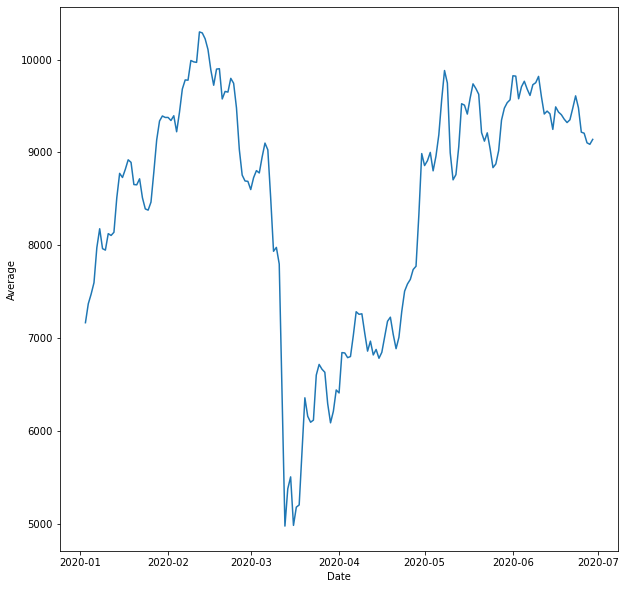

In [54]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Date', y = 'Average',data = bit1)

In [ ]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Date', y = 'Average',data = bit2)

<AxesSubplot:xlabel='Date', ylabel='Average'>

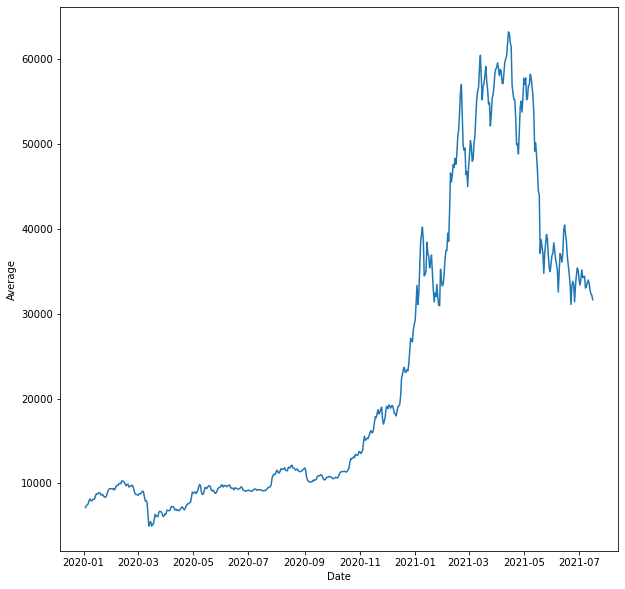

In [111]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Date', y = 'Average',data = Bitcoin)

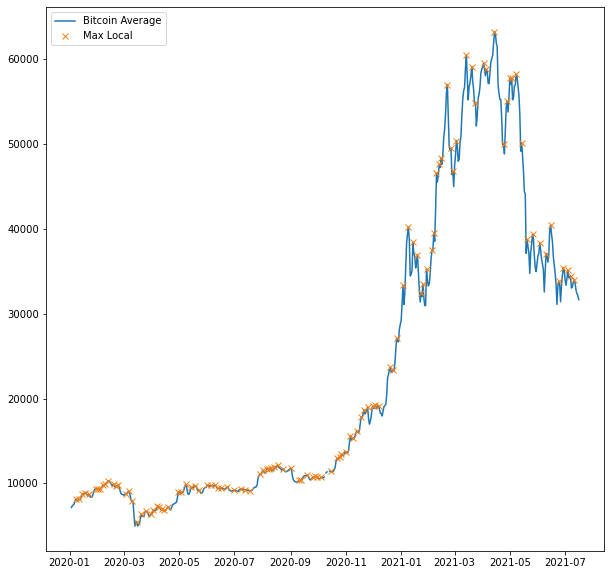

In [110]:
bit1 = Bitcoin.loc[Bitcoin["Date"]<"30/06/2020"]

bit2 = bit1.loc[bit1["Date"]>"31/03/2020"]

y = Bitcoin["Average"]
x = Bitcoin["Date"]
peaks, _ = find_peaks(y)

# this way the x-axis corresponds to the index of x
plt.figure(figsize = (10,10))
plt.plot(x, y,label='Bitcoin Average')
plt.plot(x.loc[peaks], y[peaks], "x",label='Max Local')
plt.legend()
plt.show()


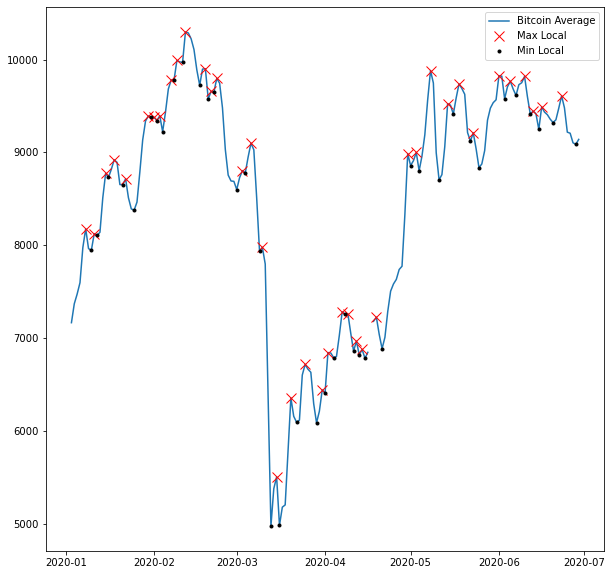

In [108]:
bit1 = Bitcoin.loc[Bitcoin["Date"]<"30/06/2020"]
y = bit1["Average"]
x = bit1["Date"]
max_, _ = find_peaks(y)
min_, _ = find_peaks(-y)

# this way the x-axis corresponds to the index of x
plt.figure(figsize = (10,10))
plt.plot(x, y,label='Bitcoin Average')
plt.plot(x.loc[max_], y[max_], "x",c="red",markersize=10,label='Max Local')
plt.plot(x.loc[min_], y[min_], "o",c="black",markersize=3,label='Min Local')
plt.legend()
plt.show()




In [89]:
peaks, _ = find_peaks(y)
x = Bitcoin["Date"]
new = x.loc[peaks]
new

4     2020-01-07
7     2020-01-10
13    2020-01-16
16    2020-01-19
22    2020-01-25
         ...    
527   2021-06-13
530   2021-06-16
535   2021-06-21
538   2021-06-24
540   2021-06-26
Name: Date, Length: 131, dtype: datetime64[ns]

In [76]:
Paises = df3[["Date_reported","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths"]].groupby("Date_reported").sum()
Paises.reset_index(inplace=True)
paises1 = Paises.loc[Paises["Date_reported"]<"01/01/2021"]
paises2 = Paises.loc[Paises["Date_reported"]>"31/12/2020"]
#paises1
#paises2
#Paises

<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

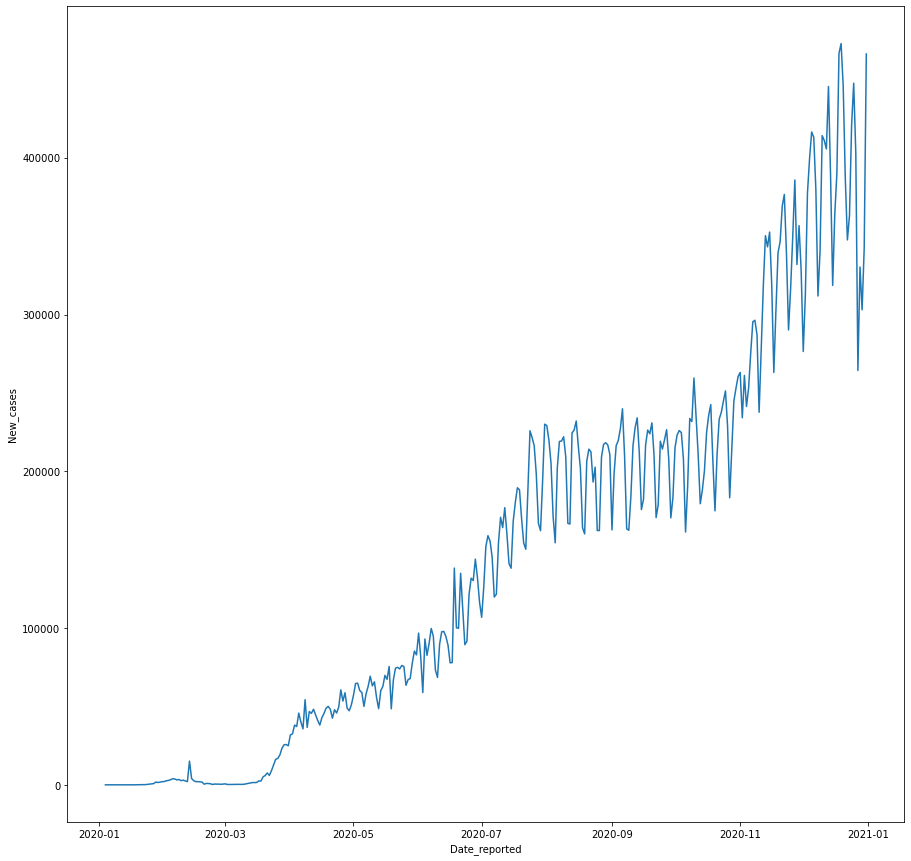

In [77]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = paises1)

<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

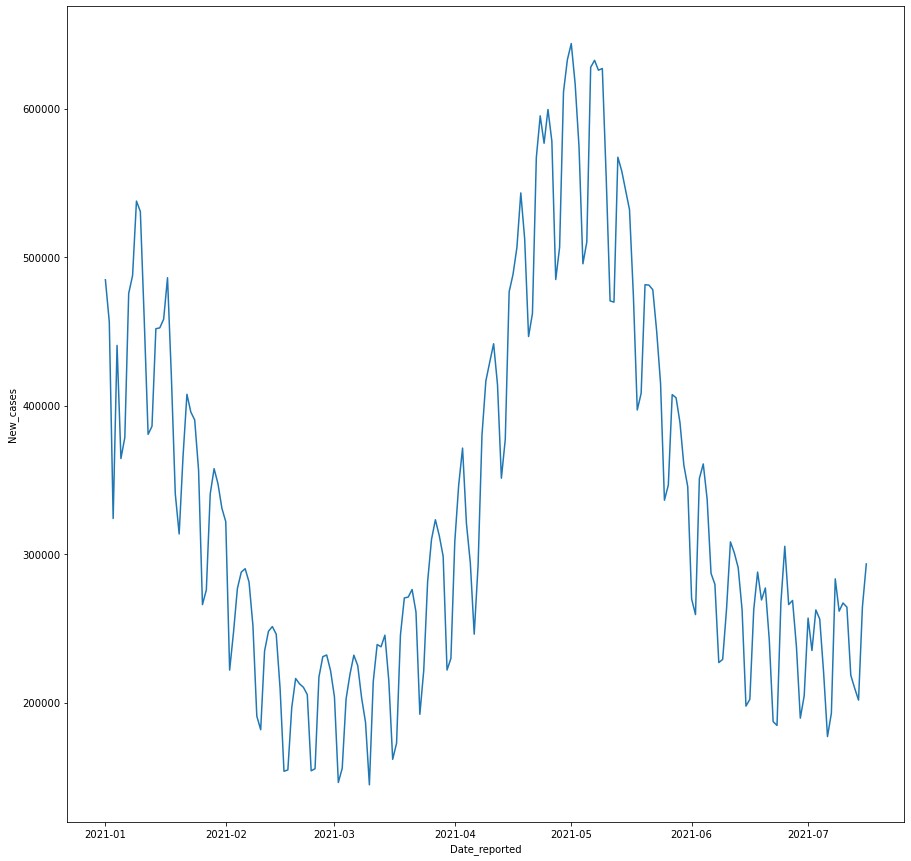

In [78]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = paises2)

<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

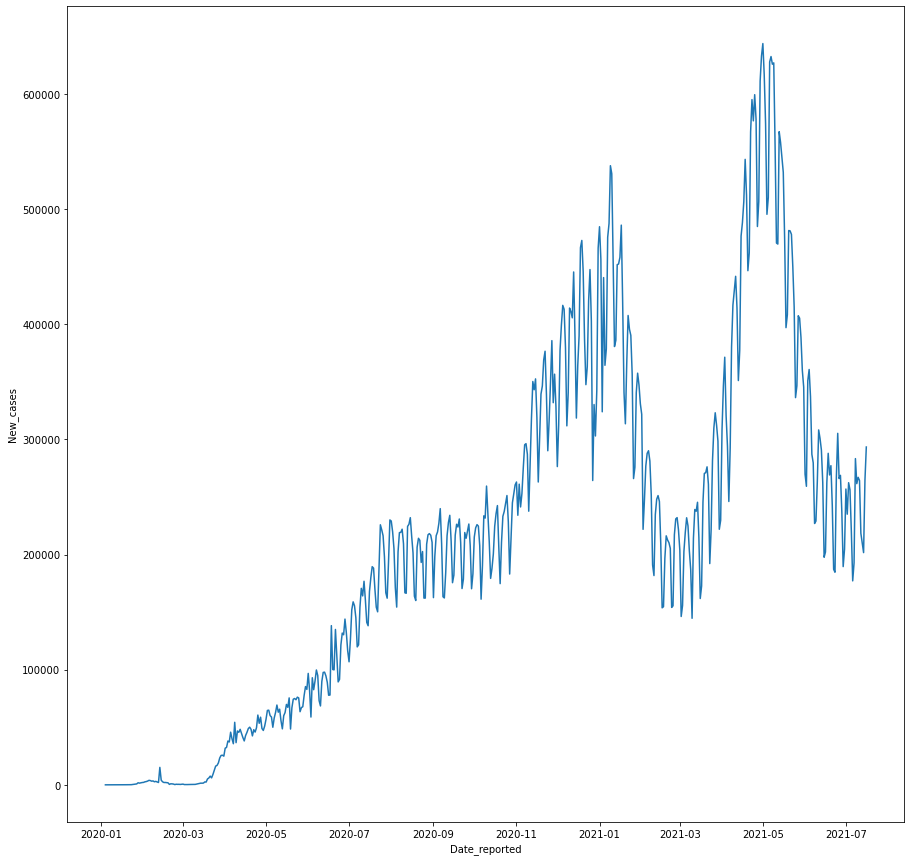

In [79]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = Paises)

<AxesSubplot:xlabel='Date_reported', ylabel='Cumulative_cases'>

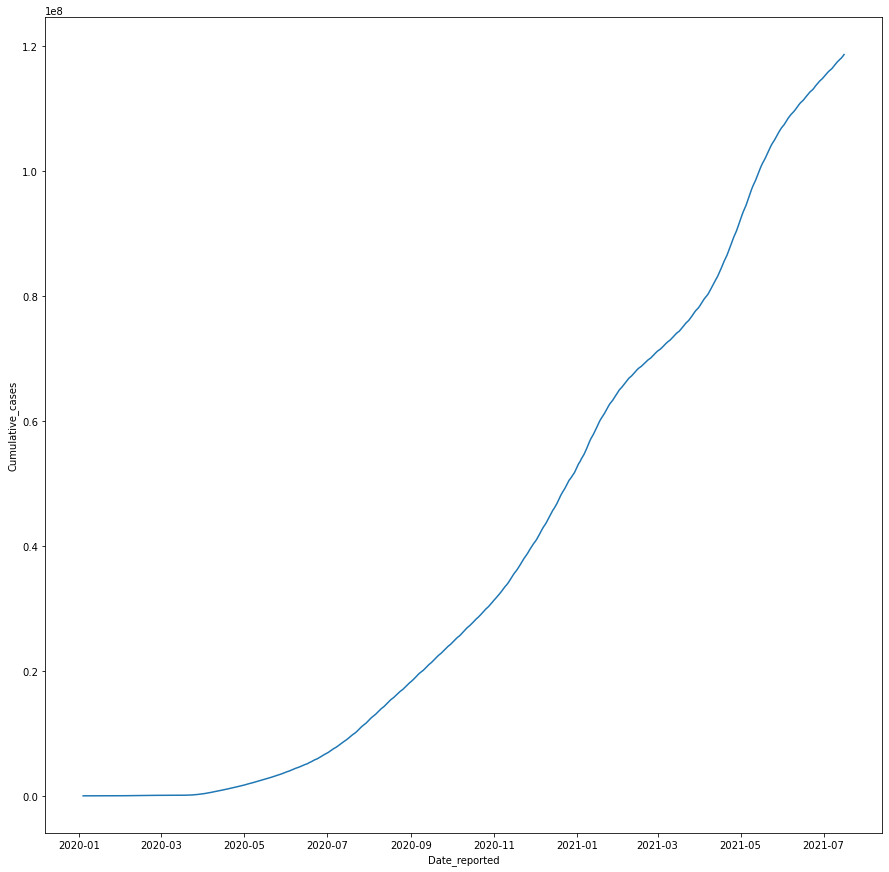

In [80]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'Cumulative_cases',data = Paises)

In [81]:
United_State = df3.query("Country=='United States of America'")
max = United_State["New_cases"].idxmax()
United_State.loc[max]
Rusia = df3.query("Country=='United States of America'")

Date_reported             2021-01-10 00:00:00
Country              United States of America
New_cases                              312247
Cumulative_cases                     21899583
New_deaths                               3601
Cumulative_deaths                      376644
Name: 126577, dtype: object

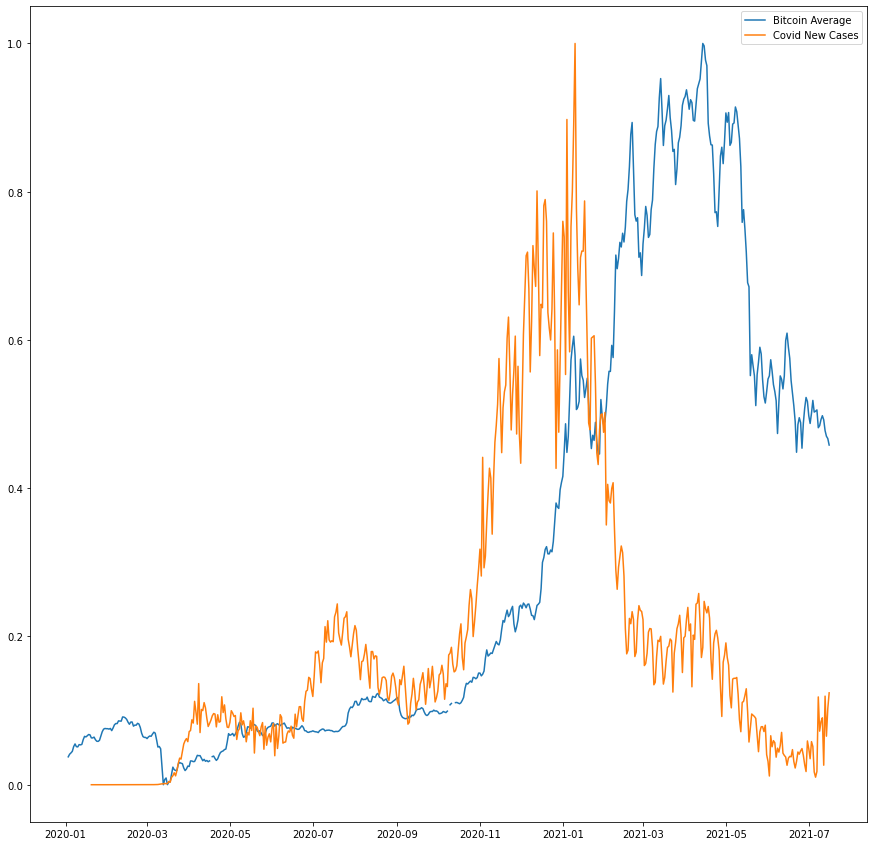

In [104]:
plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

bitc=minmax_norm_Bitcoin(Bitcoin)
US2 =minmax_norm_Pais(United_State)
y = bitc
x = Bitcoin["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = US2
x = United_State["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()
#sns.lineplot(x = 'Date_reported', y = 'New_cases',data = United_State)

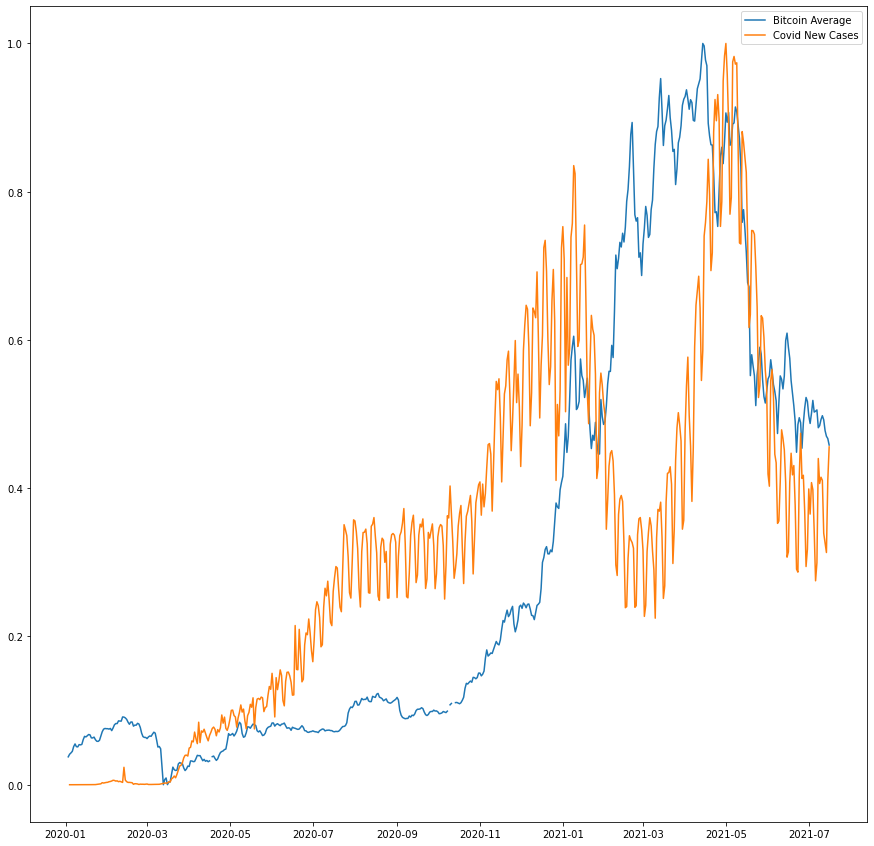

In [100]:
plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

bitc=minmax_norm_Bitcoin(Bitcoin)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = Bitcoin["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

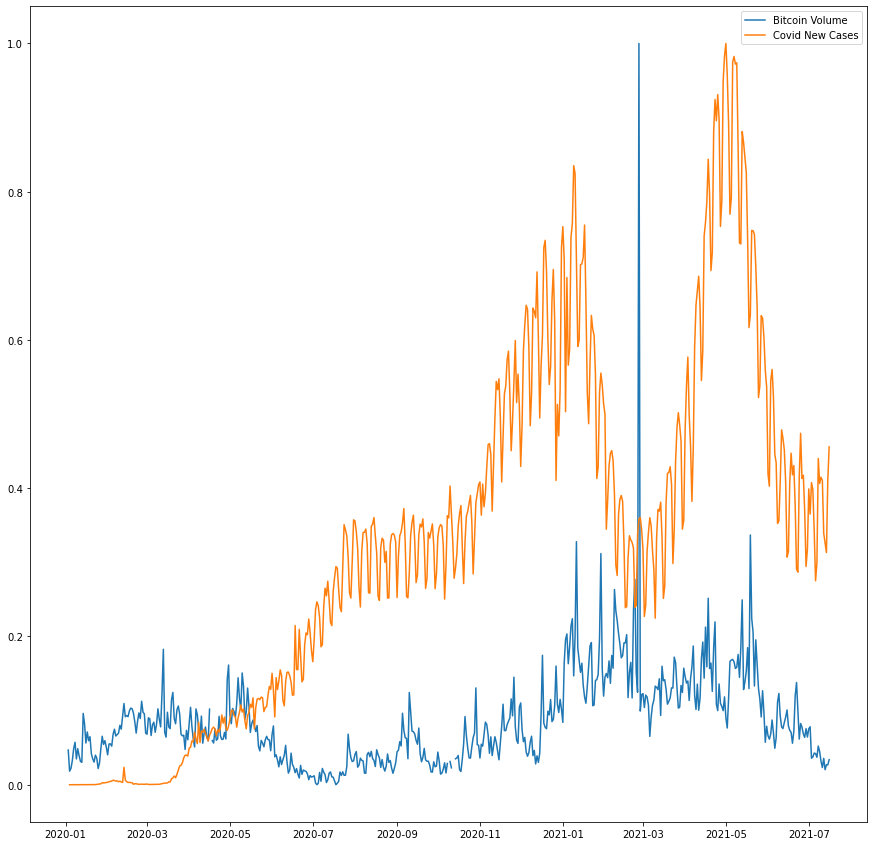

In [101]:
plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(Bitcoin)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = Bitcoin["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

In [112]:
max_i = Bitcoin["Volume"].idxmax()
Bitcoin.loc[max_i]

Date         2021-02-26 00:00:00
Open                47180.464844
High                48370.785156
Low                 44454.843750
Close               46339.761719
Adj Close           46339.761719
Volume                350.967941
Average             46412.810000
Name: 420, dtype: object

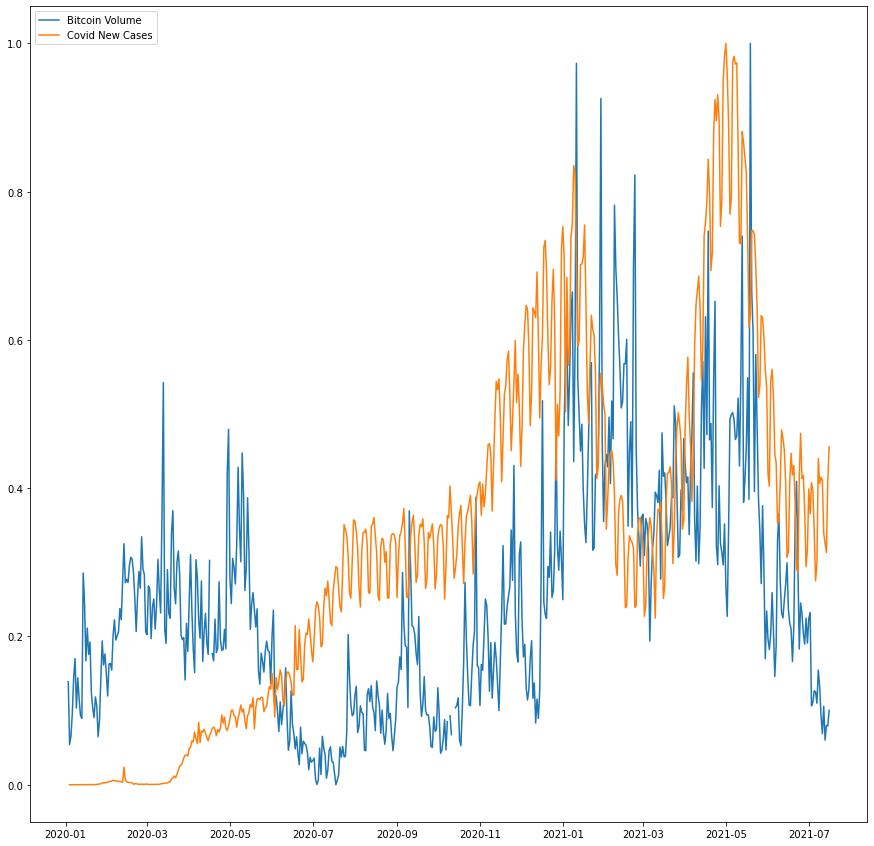

In [99]:
max_i = Bitcoin["Volume"].idxmax()
Bitcoin2=Bitcoin.loc[Bitcoin.index!=max_i]

plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(Bitcoin2)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = Bitcoin2["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

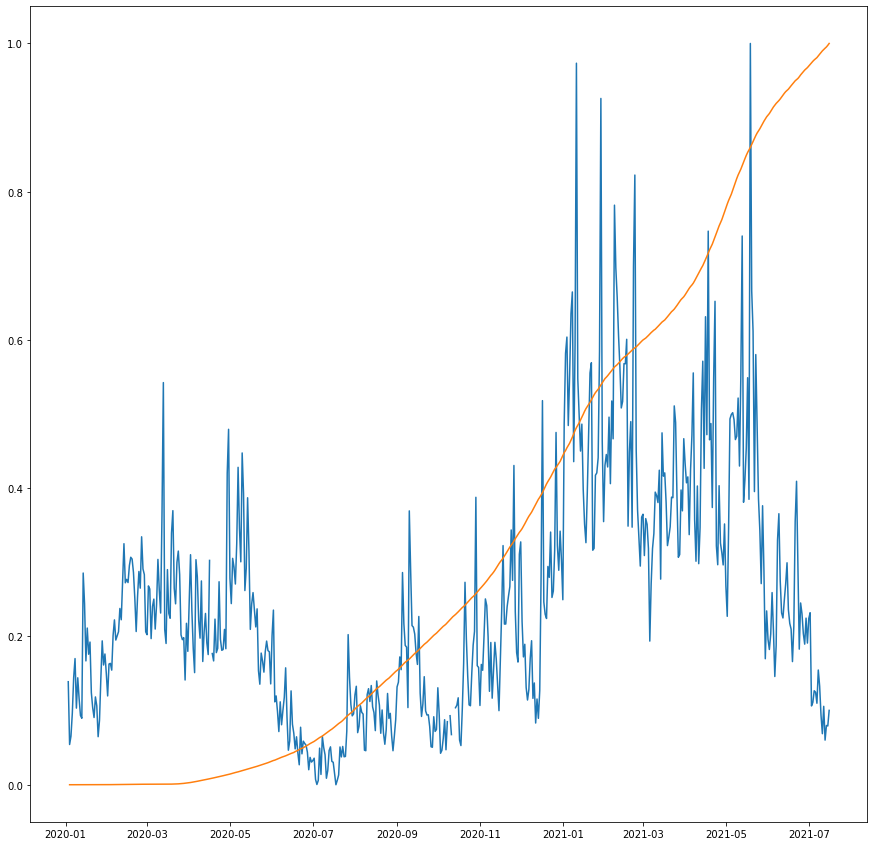

In [97]:

max_i = Bitcoin["Volume"].idxmax()
Bitcoin2=Bitcoin.loc[Bitcoin.index!=max_i]

plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["Cumulative_cases"] - df["Cumulative_cases"].min()) / ( df["Cumulative_cases"].max() - df["Cumulative_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(Bitcoin2)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = Bitcoin2["Date"]
plt.plot(x, y)
y = US2
x = Paises["Date_reported"]
plt.plot(x, y)

In [127]:
def add_weekday(row):
    if(row["Date"].dayofweek<5):
        return 0
    else:
        return 1
Bitcoin["isWeekEnd"] = Bitcoin.apply(add_weekday,axis=1)   
Bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume,Average,isWeekDay,isWeekEnd
0,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28.111481,7164.36,0,0
1,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18.444271,7368.45,1,1
2,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19.725074,7472.52,1,1
3,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23.276262,7595.58,0,0
4,2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,28.767291,7973.22,0,0
...,...,...,...,...,...,...,...,...,...,...
556,2021-07-12,34254.015625,34592.156250,32697.308594,33155.847656,33155.847656,24.321500,33644.73,0,0
557,2021-07-13,33125.468750,33327.101563,32261.419922,32702.025391,32702.025391,19.120857,32794.26,0,0
558,2021-07-14,32723.845703,33061.398438,31639.125000,32822.347656,32822.347656,21.376531,32350.26,0,0
559,2021-07-15,32827.875000,33159.640625,31175.708984,31780.730469,31780.730469,21.300524,32167.67,0,0


<AxesSubplot:ylabel='Volume'>

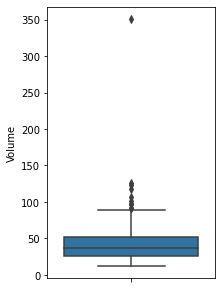

In [138]:
max_i = Bitcoin["Volume"].idxmax()
Bitcoin2=Bitcoin.loc[Bitcoin.index!=max_i]

plt.figure(figsize = (3,5))

sns.boxplot(y="Volume",data = Bitcoin)

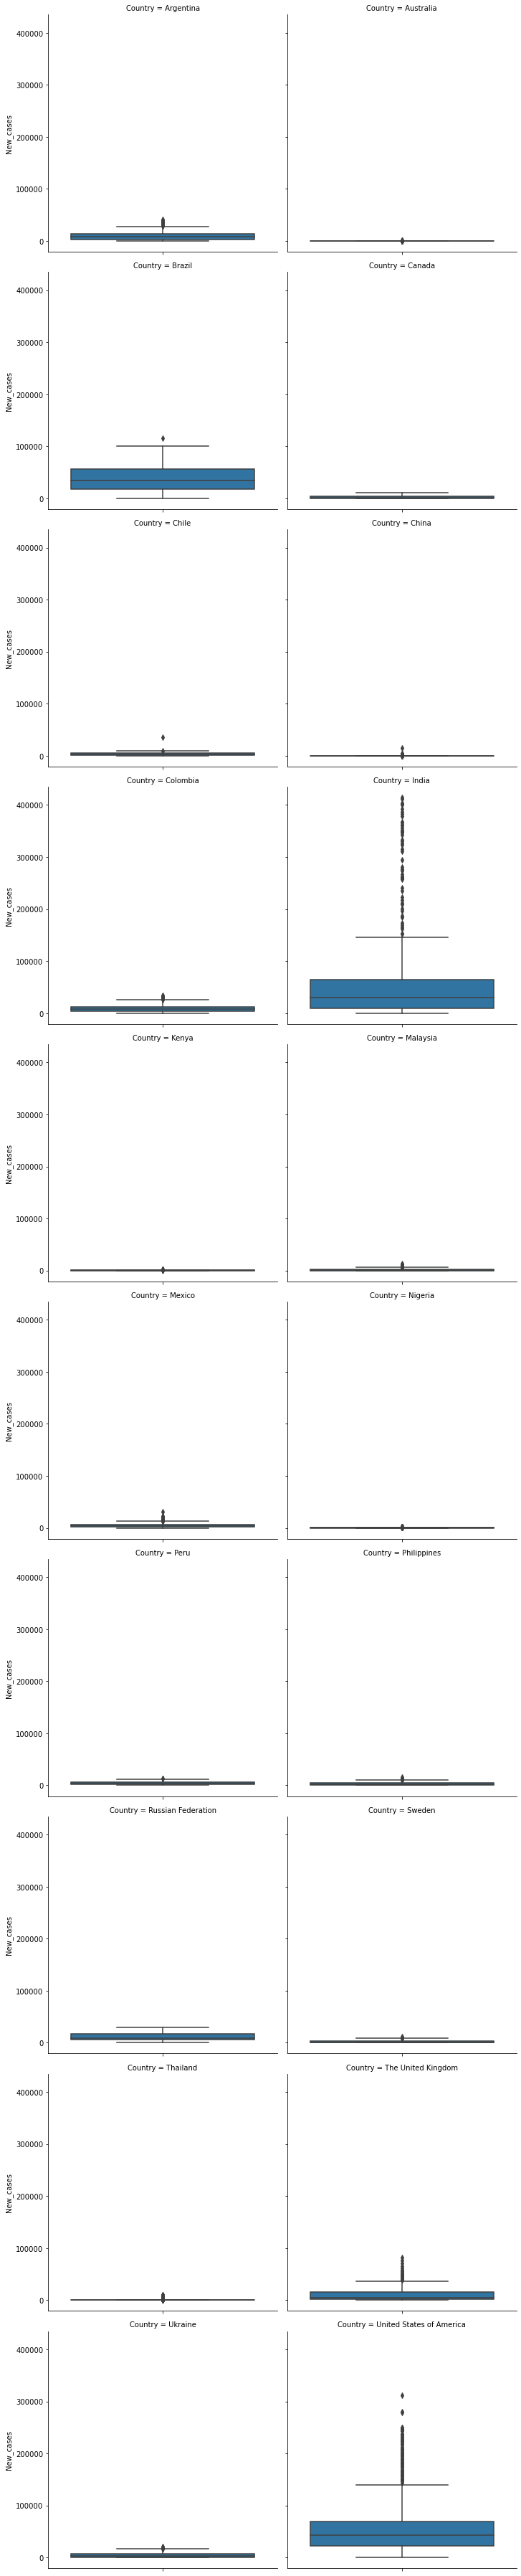

In [148]:
df3


#sns.boxplot(x="Country",y="New_cases",data = df3)
sns.catplot(y="New_cases",data = df3, kind="box", col="Country", col_wrap=2)

<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

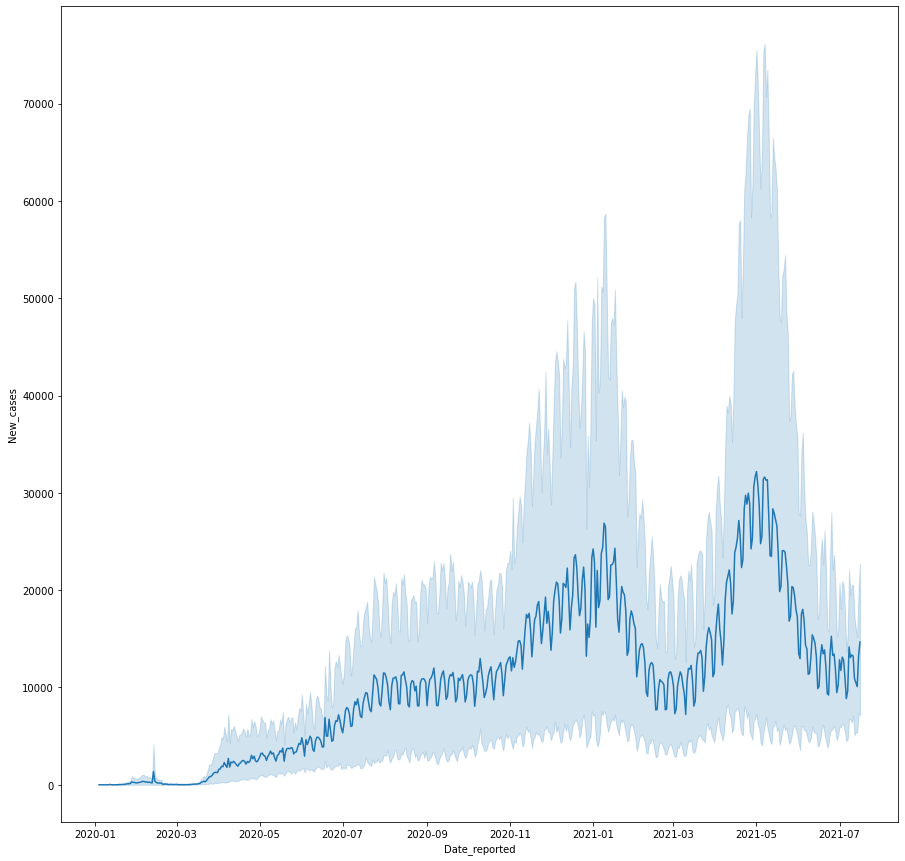

In [152]:
plt.figure(figsize = (15,15))
sns.lineplot(x= "Date_reported",y = 'New_cases',data = df3)

<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

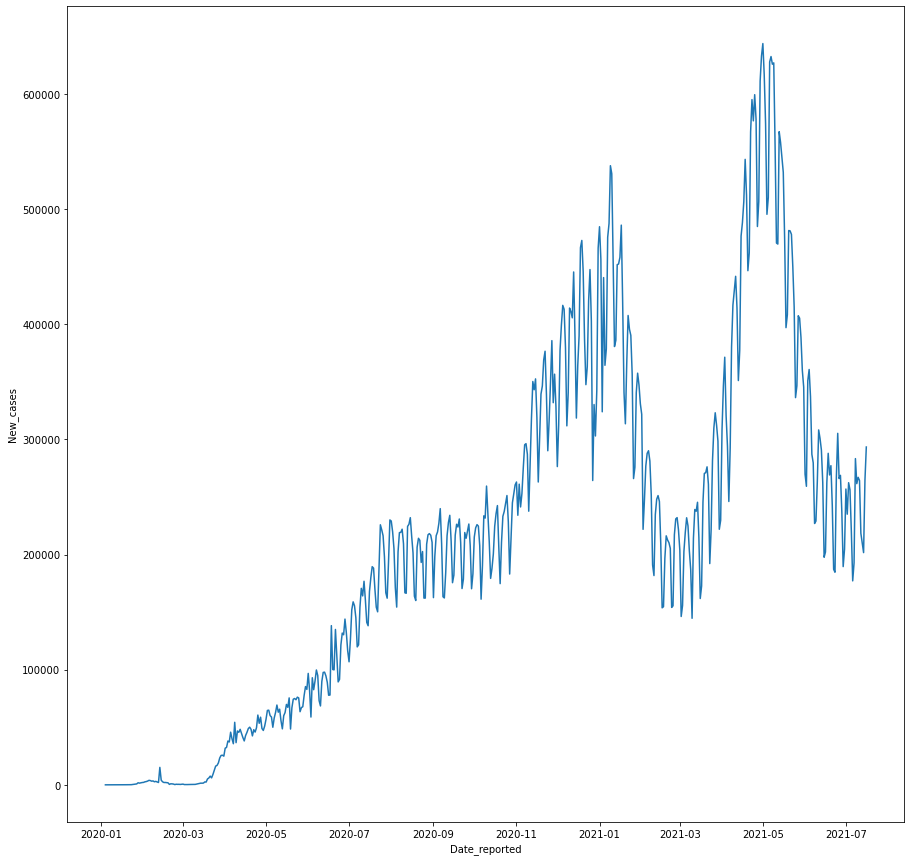

In [153]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = Paises)

In [ ]:
'''
1.- ¿Cual es la realacion que existe entre la pandemia del Covid y la bolsa de valores del Bitcoin (con respecto al volumen)?
2.- ¿Cual es la realacion que existe entre la pandemia del Covid y la bolsa de valores del Bitcoin (con respecto al valor)?
3.- ¿Cuales son las caracteriscas mas influyentes para esta correlacion?
'''

In [ ]:
df_index = df3.index

In [ ]:
df_index #aqui solo retorna el objeto el valor inicial y el fin de los indices del dataframe

In [ ]:
df3.columns

In [ ]:
df_index.values #convertir en un array los valores de los indices

In [ ]:
df3.values #toma los valores del dataframe pero no toma los indices ni las columnas y lo transforma en una matriz tipo numpy

In [ ]:
df3.dtypes #tipo de clase es cada columna

In [ ]:
df3.info() #info mas detallada del dataframe

In [ ]:
df3.describe() #estadisticas del dataframe